# H2o: Machine Learning with Python
**Josep Puig**


In [3]:
import numpy as np
import pandas as pd
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,43 secs
H2O cluster version:,3.10.4.1
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_josep_wa8cu4
H2O cluster total nodes:,1
H2O cluster free memory:,1.854 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [4]:
df = h2o.import_file('bank_response_data.txt')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
print('Dimensions:', df.shape)
print(df.head(3))
print(df.col_names)

('Dimensions:', (3000, 21))


Age,Months as a Customer,Number of Products,RFM Score,Average Balance Feed Index,Number of Transactions,Personal Debt to Equity Ratio,Months Current Account,Number of Loan Accounts,Customer ID,Members Within Household,Number of Call Center Contacts,Gender,Marital Status,Age Youngest Child,Number of Workers in Household,Percentage White Collar Workers,Household Debt to Equity Ratio,Income,Campaign ID,Response
40,24,3,13.1457,179,1,40,12,5,58986,4,9,F,M,12,12,30,57,54047,4,0
40,24,3,13.1457,179,1,40,12,5,58986,4,9,F,M,12,12,30,57,54047,3,0
36,36,0,0,0,0,36,35,0,435,5,10,M,S,8,9,22,67,36405,2,0



[u'Age', u'Months as a Customer', u'Number of Products', u'RFM Score', u'Average Balance Feed Index', u'Number of Transactions', u'Personal Debt to Equity Ratio', u'Months Current Account', u'Number of Loan Accounts', u'Customer ID', u'Members Within Household', u'Number of Call Center Contacts', u'Gender', u'Marital Status', u'Age Youngest Child', u'Number of Workers in Household', u'Percentage White Collar Workers', u'Household Debt to Equity Ratio', u'Income', u'Campaign ID', u'Response']


In [6]:
df1 = df[[u'Age', u'Months as a Customer', u'Number of Products', u'RFM Score', 
          u'Average Balance Feed Index', u'Number of Transactions', u'Personal Debt to Equity Ratio',
          u'Months Current Account', u'Number of Loan Accounts', u'Members Within Household', 
          u'Number of Call Center Contacts', u'Gender', u'Marital Status', u'Age Youngest Child',
          u'Number of Workers in Household', u'Percentage White Collar Workers', 
          u'Household Debt to Equity Ratio', u'Income', u'Response']]
df1['Response'] = df1['Response'].asfactor()
df1.head(3)
print('Dimensions:', df1.shape)

('Dimensions:', (3000, 19))


In [7]:
print 'There are', df1.isna().sum(), 'NA'
print 'Variable Gender has', df1['Gender'].nlevels(), 'levels. With', df1['Gender'].levels(),'categories'
print 'Variable Marital Status has', df1['Marital Status'].nlevels(), 'levels. With', df1['Marital Status'].levels(),'categories'

There are 0.0 NA
Variable Gender has [2] levels. With [['F', 'M']] categories
Variable Marital Status has [3] levels. With [['M', 'S', 'U']] categories


As usually, we will split the data in two parts, one to train different models, and the other to validate them.

In [8]:
train, test = df1.split_frame(ratios = [.7])

I will do some useful exploration:

In [9]:
print 'Train:'
print train['Response'].table()['Count']/train.shape[0]*100
print 'Test:'
print test['Response'].table()['Count']/test.shape[0]*100
print 'We can observe that the split has been made randomly!'

Train:


Count
95.6958
4.30416



Test:


Count
97.6898
2.31023



We can observe that the split has been made randomly!


## Logistic Regression

> model1 = H2OGeneralizedLinearEstimator(family = 'binomial')

- Family = 'binomial', 'gaussian', 'gamma'

> model1.train(x=None, y=None, training_frame=None, offset_column=None, fold_column=None, weights_column=None, validation_frame=None, max_runtime_secs=None, ignored_columns=None, model_id=None)

- x: A list of column names or indices indicating the predictor columns.
- y: An index or a column name indicating the response column.
- training_frame: The data frame m
- validation_frame: H2OFrame with validation data to be scored on while training.


In [10]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
model1 = H2OGeneralizedLinearEstimator(family = 'binomial')
model1.train(x  = train.names[0:17], y = 'Response', training_frame=train, validation_frame=test)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [11]:
#Summary
model1.summary()

GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.203E-4 )",20,19,5,py_15_sid_b5ce


In [12]:
model1_auc_train  = model1.auc(train = True)
model1_auc_test = model1.auc(valid = True)
print 'The AUC for Train is:', model1.auc(train = True)
print 'The AUC for Test is:', model1.auc(valid = True)

The AUC for Train is: 0.841951246599
The AUC for Test is: 0.865052552553


In [13]:
model1.coef()

{u'Age': -0.02223859791843772,
 u'Age Youngest Child': 0.03644204180816866,
 u'Average Balance Feed Index': 0.0008531156823346145,
 u'Gender.F': -0.09022080491288942,
 u'Gender.M': 0.08981365838344052,
 u'Household Debt to Equity Ratio': 0.03512719188974675,
 u'Intercept': -6.115759615746573,
 u'Marital Status.M': 0.26710277016797107,
 u'Marital Status.S': -0.5513606369130026,
 u'Marital Status.U': 0.0,
 u'Members Within Household': 0.1304961914870596,
 u'Months Current Account': -0.012678826203071947,
 u'Months as a Customer': 0.013951916046104013,
 u'Number of Call Center Contacts': 0.013514313899694845,
 u'Number of Loan Accounts': -0.19304752442581696,
 u'Number of Products': 0.08329443398317715,
 u'Number of Transactions': -0.2614671037201557,
 u'Number of Workers in Household': -0.0021781209721636256,
 u'Percentage White Collar Workers': 0.0023717755458215065,
 u'Personal Debt to Equity Ratio': -0.02223859791843702,
 u'RFM Score': 0.21946020430633986}

Now, I will compute how change the probability of reponsing in a positve way (Response = 1) depending on the number of transactions:

In [14]:
model1.partial_plot(train, cols = ['Number of Transactions'])

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model GLM_model_python_1491299210527_1 on column 'Number of Transactions'



number_of_transactions,mean_response,stddev_response
0.0,0.1001185,0.2168059
1.5789474,0.0843838,0.2092098
3.1578947,0.0721320,0.2018869
4.7368421,0.0624943,0.1944726
6.3157895,0.0547570,0.1866946
7.8947368,0.0483619,0.1783544
9.4736842,0.0428913,0.1693264
11.0526316,0.0380469,0.1595535
12.6315789,0.0336289,0.1490335
14.2105263,0.0295144,0.1378155


[]

## Gradient Boosting

> GradientBoostingEstimator()

Inside the GradientBoostingEstimator() you can include lots of parameters to fit correctly the model; some of them:

    1. Distribution function
    can be: "auto" (Default), "bernoulli", "multinomial", "gaussian", "poisson", "gamma", "tweedie", "laplace", "quantile", "huber"
    
    2.  learn_rate
    Learning rate from 0 to 1 (default is 0.1)
    
    3.  max_depth
    Maximum tree depth.
    
    4.  ntrees
    Number of trees.


> model2.train(x=None, y=None, training_frame=None, offset_column=None, fold_column=None, weights_column=None, validation_frame=None, max_runtime_secs=None, ignored_columns=None, model_id=None)

- x: A list of column names or indices indicating the predictor columns.
- y: An index or a column name indicating the response column.
- training_frame: the data frame
- validation_frame: H2OFrame with validation data to be scored on while training.


In [15]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [16]:
model2 = H2OGradientBoostingEstimator(distribution = 'bernoulli', ntrees = 20, learn_rate = .2)
model2.train(x = train.names[0:17], y = 'Response', training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [17]:
model2.summary()

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,20.0,20.0,6173.0,5.0,5.0,5.0,9.0,24.0,17.2


In [18]:
model2_auc_train  = model2.auc(train = True)
model2_auc_test = model2.auc(valid = True)
print 'The AUC for Train is:', model2_auc_train
print 'The AUC for Test is:', model2_auc_test
print '  There is clearly overfitting!'

The AUC for Train is: 0.974385029707
The AUC for Test is: 0.786706349206
  There is clearly overfitting!


Now, I will try to find out the parameters like number of trees, the maximum depth, ...
I will do a grid search to find the best parameters for my model:

> H2OGridSearch(self, model, hyper_params, grid_id=None, search_criteria=None)

- model: The type of model to be explored
- hyper_params: A dictionary of string parameters (keys) and a list of values to be explored by grid search (values).
- search_criteria:  A dictionary of directives which control the search of the hyperparameter space.

In [19]:
from h2o.grid.grid_search import H2OGridSearch

ntrees_options = [5,50,100]
max_depth_options = [2,3,6]
learn_rate_options = [0.1,0.4]

hyper_params = {'ntrees': ntrees_options, 
                'max_depth': max_depth_options,
                'learn_rate': learn_rate_options}

In [20]:
model3 = H2OGridSearch(H2OGradientBoostingEstimator, hyper_params = hyper_params)

The same arguments like other models:
> model3.train(x=None, y=None, training_frame=None, offset_column=None, fold_column=None, weights_column=None, validation_frame=None, max_runtime_secs=None, ignored_columns=None, model_id=None)

In [21]:
model3.train(x = train.names[0:17], y = 'Response', training_frame=train, validation_frame=test)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [22]:
model3.summary()


Grid Summary:



Model Id,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_12,100.0,100.0,14035.0,2.0,2.0,2.0,3.0,4.0,3.79
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_6,50.0,50.0,7028.0,2.0,2.0,2.0,3.0,4.0,3.82
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_8,50.0,50.0,8987.0,3.0,3.0,3.0,5.0,8.0,6.96
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_7,50.0,50.0,7029.0,2.0,2.0,2.0,3.0,4.0,3.82
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_14,100.0,100.0,17825.0,3.0,3.0,3.0,4.0,8.0,6.82
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_4,5.0,5.0,2174.0,6.0,6.0,6.0,23.0,31.0,27.2
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_3,5.0,5.0,813.0,3.0,3.0,3.0,4.0,8.0,5.6
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_2,5.0,5.0,935.0,3.0,3.0,3.0,7.0,8.0,7.6
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_1,5.0,5.0,686.0,2.0,2.0,2.0,3.0,4.0,3.6
Grid_GBM_py_15_sid_b5ce_model_python_1491299210527_109_model_0,5.0,5.0,710.0,2.0,2.0,2.0,4.0,4.0,4.0


In [23]:
print 'AUC for train:'
gr = pd.DataFrame(zip(model3.auc(train = True).values(),model3.auc(valid=True).values()),
                  columns=['Train','Test'])
gr

AUC for train:


,Train,Test
0,0.998112,0.774399
1,0.994575,0.819364
2,0.969721,0.800166
3,0.925035,0.860119
4,0.997473,0.773515
5,0.964551,0.832985
6,0.998112,0.784159
7,0.997868,0.813331
8,0.982828,0.769734
9,0.936029,0.843844


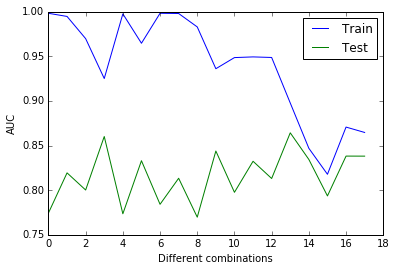

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(gr.index, gr['Train'], label = 'Train')
plt.plot(gr.index, gr['Test'], label = 'Test')
plt.legend(loc = 0)
plt.xlabel('Different combinations')
plt.ylabel('AUC')

## Random Forest

Posible arguments:

    1. balance_classes
    Balance training data class counts via over/under-sampling (for imbalanced data). (True or False(Default))
        
    2. ntrees
    Number of trees.
    
    3. max_depth

    Maximum tree depth.

In [25]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [26]:
model4 = H2ORandomForestEstimator(max_depth = 2, ntrees = 40, balance_classes = False)
model4.train(x = train.names[0:17], y = 'Response', training_frame=train, validation_frame=test)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
model4_auc_train  = model4.auc(train = True)
model4_auc_test = model4.auc(valid = True)
print 'The AUC for Train is:', model4_auc_train
print 'The AUC for Test is:', model4_auc_test

The AUC for Train is: 0.817091454273
The AUC for Test is: 0.847436722437


## Deep learning

> H2ODeepLearningEstimator()

    1. Activation function: One of: "tanh", "tanh_with_dropout", "rectifier", "rectifier_with_dropout", "maxout", "maxout_with_dropout" (default: "rectifier").
    
    2. adaptive_rate: Adaptive learning rate.True or False

    3. autoencoder: Auto-Encoder. (True or False)

    4. balance_classes: Balance training data class counts via over/under-sampling (for imbalanced data). 
    True or False
    
    5. L1: regularization (can add stability and improve generalization, causes many weights to become 0).Type: float (default: 0).
    
    6. L2: regularization (can add stability and improve generalization, causes many weights to be small.Type: float (default: 0).


> model4.train(x=None, y=None, training_frame=None, offset_column=None, fold_column=None, weights_column=None, validation_frame=None, max_runtime_secs=None, ignored_columns=None, model_id=None)

In [31]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
model5 = H2ODeepLearningEstimator(activation = 'tanh', balance_classes = True)
model5.train(x = train.names[0:17], y = 'Response', training_frame=train, validation_frame=test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [32]:
model5_auc_train  = model5.auc(train = True)
model5_auc_test = model5.auc(valid = True)
print 'The AUC for Train is:', model5_auc_train
print 'The AUC for Test is:', model5_auc_test



The AUC for Train is: 0.869919435886
The AUC for Test is: 0.821294508795


In [33]:
model5.summary()

Status of Neuron Layers: predicting Response, 2-class classification, bernoulli distribution, CrossEntropy loss, 45.202 weights/biases, 543,9 KB, 40.030 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,22,Input,0.0,,,,,,,,,
,2,200,Tanh,0.0,0.0,0.0,0.0965089,0.2825511,0.0,-0.0006399,0.0978637,0.0031985,0.0393721
,3,200,Tanh,0.0,0.0,0.0,0.2073239,0.2943738,0.0,-0.0000038,0.0744068,-0.0063243,0.0820260
,4,2,Softmax,,0.0,0.0,0.0042242,0.0024954,0.0,0.0073971,0.3713599,-0.0000012,0.1224562


In [34]:
print model5.model_performance(train = True)


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.32891104652
RMSE: 0.573507669103
LogLoss: 1.70442715767
Mean Per-Class Error: 0.206624709623
AUC: 0.869919435886
Gini: 0.739838871773
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.000356278912612: 


,0,1,Error,Rate
0,1272.0,729.0,0.3643,(729.0/2001.0)
1,110.0,1892.0,0.0549,(110.0/2002.0)
Total,1382.0,2621.0,0.2096,(839.0/4003.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0003563,0.8185161,378.0
max f2,0.0003563,0.8900179,378.0
max f0point5,0.0625758,0.7939334,150.0
max accuracy,0.0006370,0.7934049,371.0
max precision,0.8752631,0.9729730,17.0
max recall,0.0000090,1.0,398.0
max specificity,0.9972884,0.9995002,0.0
max absolute_mcc,0.0003563,0.6107277,378.0
max min_per_class_accuracy,0.0024820,0.7731134,330.0
max mean_per_class_accuracy,0.0006370,0.7933753,371.0


Gains/Lift Table: Avg response rate: 50,01 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0114914,0.9858699,1.9125657,1.9125657,0.9565217,0.9565217,0.0219780,0.0219780,91.2565695,91.2565695
,2,0.0229828,0.9801040,1.9125657,1.9125657,0.9565217,0.9565217,0.0219780,0.0439560,91.2565695,91.2565695
,3,0.0339745,0.9740878,1.9995005,1.9406917,1.0,0.9705882,0.0219780,0.0659341,99.9500499,94.0691661
,4,0.0402198,0.9508971,1.8395405,1.9249850,0.92,0.9627329,0.0114885,0.0774226,83.9540460,92.4984953
,5,0.0512116,0.9388811,1.9995005,1.9409785,1.0,0.9707317,0.0219780,0.0994006,99.9500499,94.0978534
,6,0.1054209,0.6989786,1.8705005,1.9047374,0.9354839,0.9526066,0.1013986,0.2007992,87.0500467,90.4737443
,7,0.1553835,0.3555274,1.7795554,1.8644860,0.89,0.9324759,0.0889111,0.2897103,77.9555445,86.4485996
,8,0.2000999,0.2131996,1.7537518,1.8397402,0.8770950,0.9200999,0.0784216,0.3681319,75.3751835,83.9740160
,9,0.3022733,0.0654450,1.6328439,1.7698058,0.8166259,0.8851240,0.1668332,0.5349650,63.2843929,76.9805814
,10,0.4004497,0.0104617,1.2414202,1.6402640,0.6208651,0.8203369,0.1218781,0.6568432,24.1420157,64.0263978


In [35]:
print model5.model_performance(valid = True)


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0346293683993
RMSE: 0.186089678379
LogLoss: 0.169137493409
Mean Per-Class Error: 0.23351029601
AUC: 0.821294508795
Gini: 0.642589017589
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.154378508479: 


,0,1,Error,Rate
0,841.0,47.0,0.0529,(47.0/888.0)
1,12.0,9.0,0.5714,(12.0/21.0)
Total,853.0,56.0,0.0649,(59.0/909.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1543785,0.2337662,49.0
max f2,0.0789082,0.3481013,66.0
max f0point5,0.5788263,0.2293578,18.0
max accuracy,0.9980370,0.9746975,0.0
max precision,0.5788263,0.2272727,18.0
max recall,0.0000002,1.0,399.0
max specificity,0.9980370,0.9977477,0.0
max absolute_mcc,0.0789082,0.2487851,66.0
max min_per_class_accuracy,0.0014616,0.7319820,228.0
max mean_per_class_accuracy,0.0057323,0.7664897,156.0


Gains/Lift Table: Avg response rate:  2,31 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0110011,0.9513735,8.6571429,8.6571429,0.2,0.2,0.0952381,0.0952381,765.7142857,765.7142857
,2,0.0209021,0.7143552,9.6190476,9.1127820,0.2222222,0.2105263,0.0952381,0.1904762,861.9047619,811.2781955
,3,0.0308031,0.4184143,4.8095238,7.7295918,0.1111111,0.1785714,0.0476190,0.2380952,380.9523810,672.9591837
,4,0.0407041,0.3049688,4.8095238,7.0193050,0.1111111,0.1621622,0.0476190,0.2857143,380.9523810,601.9305019
,5,0.0506051,0.2102586,0.0,5.6459627,0.0,0.1304348,0.0,0.2857143,-100.0,464.5962733
,6,0.1001100,0.0520141,4.8095238,5.2323391,0.1111111,0.1208791,0.2380952,0.5238095,380.9523810,423.2339089
,7,0.1507151,0.0146880,1.8819876,4.1074035,0.0434783,0.0948905,0.0952381,0.6190476,88.1987578,310.7403545
,8,0.2002200,0.0048856,1.9238095,3.5675039,0.0444444,0.0824176,0.0952381,0.7142857,92.3809524,256.7503925
,9,0.3003300,0.0012449,0.9513344,2.6954474,0.0219780,0.0622711,0.0952381,0.8095238,-4.8665620,169.5447410
,10,0.4004400,0.0003612,0.9513344,2.2594192,0.0219780,0.0521978,0.0952381,0.9047619,-4.8665620,125.9419152
